# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

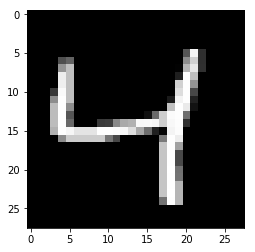

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [19]:
# Size of the encoding layer (the hidden layer)
input_dim = 784
encoding_dim = 32 # feel free to change this value

inputs_ = tf.placeholder(tf.float32, [None, input_dim], name='inputs')
targets_ = tf.placeholder(tf.float32, [None, input_dim], name='targets')

# Output of hidden layer
# weight_1  = tf.Variable(tf.truncated_normal([input_dim, encoding_dim], 0.0, stddev=0.1))
# bias_1 = tf.Variable(tf.zeros(encoding_dim))
# encoded = tf.add(tf.matmul(inputs_, weight_1), bias_1)

encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
# logits = tf.nn.relu(encoded)
logits = tf.layers.dense(encoded, input_dim, activation = None)

# Sigmoid output from logits
# weight_2  = tf.Variable(tf.truncated_normal([encoding_dim, input_dim], 0.0, stddev=0.1))
# bias_2 = tf.Variable(tf.zeros(input_dim))
# decoded = tf.add(tf.matmul(logits, weight_2), bias_2)
# outputs_ = tf.nn.sigmoid(decoded)
outputs_ = tf.nn.sigmoid(logits, name='output') # logits

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [20]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [21]:
epochs = 10 # 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/10... Training loss: 0.6938
Epoch: 1/10... Training loss: 0.6904
Epoch: 1/10... Training loss: 0.6871
Epoch: 1/10... Training loss: 0.6831
Epoch: 1/10... Training loss: 0.6790
Epoch: 1/10... Training loss: 0.6725
Epoch: 1/10... Training loss: 0.6655
Epoch: 1/10... Training loss: 0.6583
Epoch: 1/10... Training loss: 0.6482
Epoch: 1/10... Training loss: 0.6364
Epoch: 1/10... Training loss: 0.6242
Epoch: 1/10... Training loss: 0.6118
Epoch: 1/10... Training loss: 0.5959
Epoch: 1/10... Training loss: 0.5783
Epoch: 1/10... Training loss: 0.5631
Epoch: 1/10... Training loss: 0.5461
Epoch: 1/10... Training loss: 0.5279
Epoch: 1/10... Training loss: 0.5094
Epoch: 1/10... Training loss: 0.4926
Epoch: 1/10... Training loss: 0.4781
Epoch: 1/10... Training loss: 0.4571
Epoch: 1/10... Training loss: 0.4442
Epoch: 1/10... Training loss: 0.4247
Epoch: 1/10... Training loss: 0.4122
Epoch: 1/10... Training loss: 0.3906
Epoch: 1/10... Training loss: 0.3900
Epoch: 1/10... Training loss: 0.3762
E

Epoch: 1/10... Training loss: 0.1996
Epoch: 1/10... Training loss: 0.1925
Epoch: 1/10... Training loss: 0.1880
Epoch: 1/10... Training loss: 0.1981
Epoch: 1/10... Training loss: 0.1996
Epoch: 1/10... Training loss: 0.1987
Epoch: 1/10... Training loss: 0.1975
Epoch: 1/10... Training loss: 0.1963
Epoch: 1/10... Training loss: 0.1932
Epoch: 1/10... Training loss: 0.1963
Epoch: 1/10... Training loss: 0.1882
Epoch: 1/10... Training loss: 0.1958
Epoch: 1/10... Training loss: 0.1925
Epoch: 1/10... Training loss: 0.1970
Epoch: 1/10... Training loss: 0.1995
Epoch: 1/10... Training loss: 0.1905
Epoch: 1/10... Training loss: 0.1881
Epoch: 1/10... Training loss: 0.1867
Epoch: 1/10... Training loss: 0.1896
Epoch: 1/10... Training loss: 0.1940
Epoch: 1/10... Training loss: 0.1925
Epoch: 1/10... Training loss: 0.1961
Epoch: 1/10... Training loss: 0.1871
Epoch: 1/10... Training loss: 0.1887
Epoch: 1/10... Training loss: 0.1967
Epoch: 1/10... Training loss: 0.1925
Epoch: 1/10... Training loss: 0.1855
E

Epoch: 2/10... Training loss: 0.1538
Epoch: 2/10... Training loss: 0.1587
Epoch: 2/10... Training loss: 0.1570
Epoch: 2/10... Training loss: 0.1575
Epoch: 2/10... Training loss: 0.1610
Epoch: 2/10... Training loss: 0.1569
Epoch: 2/10... Training loss: 0.1611
Epoch: 2/10... Training loss: 0.1562
Epoch: 2/10... Training loss: 0.1531
Epoch: 2/10... Training loss: 0.1638
Epoch: 2/10... Training loss: 0.1556
Epoch: 2/10... Training loss: 0.1524
Epoch: 2/10... Training loss: 0.1606
Epoch: 2/10... Training loss: 0.1569
Epoch: 2/10... Training loss: 0.1643
Epoch: 2/10... Training loss: 0.1541
Epoch: 2/10... Training loss: 0.1556
Epoch: 2/10... Training loss: 0.1545
Epoch: 2/10... Training loss: 0.1601
Epoch: 2/10... Training loss: 0.1562
Epoch: 2/10... Training loss: 0.1521
Epoch: 2/10... Training loss: 0.1576
Epoch: 2/10... Training loss: 0.1520
Epoch: 2/10... Training loss: 0.1534
Epoch: 2/10... Training loss: 0.1589
Epoch: 2/10... Training loss: 0.1586
Epoch: 2/10... Training loss: 0.1569
E

Epoch: 3/10... Training loss: 0.1358
Epoch: 3/10... Training loss: 0.1390
Epoch: 3/10... Training loss: 0.1343
Epoch: 3/10... Training loss: 0.1342
Epoch: 3/10... Training loss: 0.1410
Epoch: 3/10... Training loss: 0.1378
Epoch: 3/10... Training loss: 0.1396
Epoch: 3/10... Training loss: 0.1323
Epoch: 3/10... Training loss: 0.1346
Epoch: 3/10... Training loss: 0.1344
Epoch: 3/10... Training loss: 0.1385
Epoch: 3/10... Training loss: 0.1349
Epoch: 3/10... Training loss: 0.1378
Epoch: 3/10... Training loss: 0.1323
Epoch: 3/10... Training loss: 0.1372
Epoch: 3/10... Training loss: 0.1354
Epoch: 3/10... Training loss: 0.1378
Epoch: 3/10... Training loss: 0.1319
Epoch: 3/10... Training loss: 0.1364
Epoch: 3/10... Training loss: 0.1378
Epoch: 3/10... Training loss: 0.1414
Epoch: 3/10... Training loss: 0.1365
Epoch: 3/10... Training loss: 0.1311
Epoch: 3/10... Training loss: 0.1362
Epoch: 3/10... Training loss: 0.1354
Epoch: 3/10... Training loss: 0.1388
Epoch: 3/10... Training loss: 0.1339
E

Epoch: 4/10... Training loss: 0.1254
Epoch: 4/10... Training loss: 0.1270
Epoch: 4/10... Training loss: 0.1234
Epoch: 4/10... Training loss: 0.1259
Epoch: 4/10... Training loss: 0.1252
Epoch: 4/10... Training loss: 0.1288
Epoch: 4/10... Training loss: 0.1274
Epoch: 4/10... Training loss: 0.1254
Epoch: 4/10... Training loss: 0.1259
Epoch: 4/10... Training loss: 0.1233
Epoch: 4/10... Training loss: 0.1244
Epoch: 4/10... Training loss: 0.1237
Epoch: 4/10... Training loss: 0.1273
Epoch: 4/10... Training loss: 0.1226
Epoch: 4/10... Training loss: 0.1204
Epoch: 4/10... Training loss: 0.1224
Epoch: 4/10... Training loss: 0.1224
Epoch: 4/10... Training loss: 0.1221
Epoch: 4/10... Training loss: 0.1211
Epoch: 4/10... Training loss: 0.1246
Epoch: 4/10... Training loss: 0.1192
Epoch: 4/10... Training loss: 0.1243
Epoch: 4/10... Training loss: 0.1239
Epoch: 4/10... Training loss: 0.1263
Epoch: 4/10... Training loss: 0.1194
Epoch: 4/10... Training loss: 0.1230
Epoch: 4/10... Training loss: 0.1227
E

Epoch: 4/10... Training loss: 0.1196
Epoch: 4/10... Training loss: 0.1107
Epoch: 4/10... Training loss: 0.1138
Epoch: 4/10... Training loss: 0.1197
Epoch: 4/10... Training loss: 0.1194
Epoch: 4/10... Training loss: 0.1157
Epoch: 4/10... Training loss: 0.1182
Epoch: 4/10... Training loss: 0.1173
Epoch: 4/10... Training loss: 0.1120
Epoch: 4/10... Training loss: 0.1161
Epoch: 4/10... Training loss: 0.1161
Epoch: 4/10... Training loss: 0.1165
Epoch: 4/10... Training loss: 0.1170
Epoch: 4/10... Training loss: 0.1129
Epoch: 4/10... Training loss: 0.1166
Epoch: 4/10... Training loss: 0.1130
Epoch: 4/10... Training loss: 0.1141
Epoch: 4/10... Training loss: 0.1138
Epoch: 4/10... Training loss: 0.1192
Epoch: 4/10... Training loss: 0.1080
Epoch: 4/10... Training loss: 0.1172
Epoch: 4/10... Training loss: 0.1148
Epoch: 4/10... Training loss: 0.1184
Epoch: 4/10... Training loss: 0.1147
Epoch: 4/10... Training loss: 0.1140
Epoch: 4/10... Training loss: 0.1120
Epoch: 4/10... Training loss: 0.1169
E

Epoch: 5/10... Training loss: 0.1095
Epoch: 5/10... Training loss: 0.1107
Epoch: 5/10... Training loss: 0.1113
Epoch: 5/10... Training loss: 0.1103
Epoch: 5/10... Training loss: 0.1082
Epoch: 5/10... Training loss: 0.1121
Epoch: 5/10... Training loss: 0.1097
Epoch: 5/10... Training loss: 0.1101
Epoch: 5/10... Training loss: 0.1124
Epoch: 5/10... Training loss: 0.1066
Epoch: 5/10... Training loss: 0.1096
Epoch: 5/10... Training loss: 0.1130
Epoch: 5/10... Training loss: 0.1043
Epoch: 5/10... Training loss: 0.1064
Epoch: 5/10... Training loss: 0.1129
Epoch: 5/10... Training loss: 0.1127
Epoch: 5/10... Training loss: 0.1069
Epoch: 5/10... Training loss: 0.1090
Epoch: 5/10... Training loss: 0.1074
Epoch: 5/10... Training loss: 0.1083
Epoch: 5/10... Training loss: 0.1129
Epoch: 5/10... Training loss: 0.1096
Epoch: 5/10... Training loss: 0.1116
Epoch: 5/10... Training loss: 0.1074
Epoch: 5/10... Training loss: 0.1089
Epoch: 5/10... Training loss: 0.1086
Epoch: 5/10... Training loss: 0.1115
E

Epoch: 6/10... Training loss: 0.1055
Epoch: 6/10... Training loss: 0.1019
Epoch: 6/10... Training loss: 0.1049
Epoch: 6/10... Training loss: 0.1074
Epoch: 6/10... Training loss: 0.1018
Epoch: 6/10... Training loss: 0.1078
Epoch: 6/10... Training loss: 0.1071
Epoch: 6/10... Training loss: 0.1025
Epoch: 6/10... Training loss: 0.1083
Epoch: 6/10... Training loss: 0.1039
Epoch: 6/10... Training loss: 0.1053
Epoch: 6/10... Training loss: 0.1048
Epoch: 6/10... Training loss: 0.1028
Epoch: 6/10... Training loss: 0.1073
Epoch: 6/10... Training loss: 0.1098
Epoch: 6/10... Training loss: 0.1029
Epoch: 6/10... Training loss: 0.1073
Epoch: 6/10... Training loss: 0.1080
Epoch: 6/10... Training loss: 0.1025
Epoch: 6/10... Training loss: 0.1078
Epoch: 6/10... Training loss: 0.1099
Epoch: 6/10... Training loss: 0.1062
Epoch: 6/10... Training loss: 0.1053
Epoch: 6/10... Training loss: 0.1051
Epoch: 6/10... Training loss: 0.1042
Epoch: 6/10... Training loss: 0.1037
Epoch: 6/10... Training loss: 0.1049
E

Epoch: 7/10... Training loss: 0.1053
Epoch: 7/10... Training loss: 0.1020
Epoch: 7/10... Training loss: 0.1037
Epoch: 7/10... Training loss: 0.1017
Epoch: 7/10... Training loss: 0.1003
Epoch: 7/10... Training loss: 0.0985
Epoch: 7/10... Training loss: 0.1012
Epoch: 7/10... Training loss: 0.1021
Epoch: 7/10... Training loss: 0.1035
Epoch: 7/10... Training loss: 0.1003
Epoch: 7/10... Training loss: 0.1073
Epoch: 7/10... Training loss: 0.1038
Epoch: 7/10... Training loss: 0.0987
Epoch: 7/10... Training loss: 0.1042
Epoch: 7/10... Training loss: 0.1013
Epoch: 7/10... Training loss: 0.1025
Epoch: 7/10... Training loss: 0.1028
Epoch: 7/10... Training loss: 0.0989
Epoch: 7/10... Training loss: 0.0998
Epoch: 7/10... Training loss: 0.0995
Epoch: 7/10... Training loss: 0.1051
Epoch: 7/10... Training loss: 0.1019
Epoch: 7/10... Training loss: 0.1028
Epoch: 7/10... Training loss: 0.0977
Epoch: 7/10... Training loss: 0.1050
Epoch: 7/10... Training loss: 0.1085
Epoch: 7/10... Training loss: 0.1011
E

Epoch: 7/10... Training loss: 0.1006
Epoch: 7/10... Training loss: 0.1018
Epoch: 7/10... Training loss: 0.1014
Epoch: 7/10... Training loss: 0.0969
Epoch: 7/10... Training loss: 0.0968
Epoch: 7/10... Training loss: 0.1002
Epoch: 7/10... Training loss: 0.1016
Epoch: 7/10... Training loss: 0.0997
Epoch: 7/10... Training loss: 0.1039
Epoch: 7/10... Training loss: 0.1005
Epoch: 7/10... Training loss: 0.0984
Epoch: 7/10... Training loss: 0.1007
Epoch: 7/10... Training loss: 0.0983
Epoch: 7/10... Training loss: 0.1001
Epoch: 7/10... Training loss: 0.1025
Epoch: 7/10... Training loss: 0.1015
Epoch: 7/10... Training loss: 0.0982
Epoch: 7/10... Training loss: 0.0984
Epoch: 7/10... Training loss: 0.0980
Epoch: 7/10... Training loss: 0.1008
Epoch: 7/10... Training loss: 0.0974
Epoch: 7/10... Training loss: 0.0993
Epoch: 7/10... Training loss: 0.0992
Epoch: 7/10... Training loss: 0.1012
Epoch: 7/10... Training loss: 0.1010
Epoch: 7/10... Training loss: 0.0977
Epoch: 7/10... Training loss: 0.1007
E

Epoch: 8/10... Training loss: 0.0965
Epoch: 8/10... Training loss: 0.0972
Epoch: 8/10... Training loss: 0.0974
Epoch: 8/10... Training loss: 0.0935
Epoch: 8/10... Training loss: 0.0972
Epoch: 8/10... Training loss: 0.0979
Epoch: 8/10... Training loss: 0.0978
Epoch: 8/10... Training loss: 0.0968
Epoch: 8/10... Training loss: 0.0978
Epoch: 8/10... Training loss: 0.0980
Epoch: 8/10... Training loss: 0.0995
Epoch: 8/10... Training loss: 0.0990
Epoch: 8/10... Training loss: 0.0987
Epoch: 8/10... Training loss: 0.0957
Epoch: 8/10... Training loss: 0.0994
Epoch: 8/10... Training loss: 0.0994
Epoch: 8/10... Training loss: 0.0942
Epoch: 8/10... Training loss: 0.0975
Epoch: 8/10... Training loss: 0.0960
Epoch: 8/10... Training loss: 0.0976
Epoch: 8/10... Training loss: 0.0971
Epoch: 8/10... Training loss: 0.0997
Epoch: 8/10... Training loss: 0.0966
Epoch: 8/10... Training loss: 0.0953
Epoch: 8/10... Training loss: 0.1004
Epoch: 8/10... Training loss: 0.0969
Epoch: 8/10... Training loss: 0.0961
E

Epoch: 9/10... Training loss: 0.0967
Epoch: 9/10... Training loss: 0.0920
Epoch: 9/10... Training loss: 0.0957
Epoch: 9/10... Training loss: 0.0936
Epoch: 9/10... Training loss: 0.0970
Epoch: 9/10... Training loss: 0.0922
Epoch: 9/10... Training loss: 0.0959
Epoch: 9/10... Training loss: 0.0978
Epoch: 9/10... Training loss: 0.0970
Epoch: 9/10... Training loss: 0.0958
Epoch: 9/10... Training loss: 0.0995
Epoch: 9/10... Training loss: 0.0974
Epoch: 9/10... Training loss: 0.0972
Epoch: 9/10... Training loss: 0.0951
Epoch: 9/10... Training loss: 0.0972
Epoch: 9/10... Training loss: 0.0982
Epoch: 9/10... Training loss: 0.0937
Epoch: 9/10... Training loss: 0.0973
Epoch: 9/10... Training loss: 0.0986
Epoch: 9/10... Training loss: 0.0983
Epoch: 9/10... Training loss: 0.0965
Epoch: 9/10... Training loss: 0.0971
Epoch: 9/10... Training loss: 0.0979
Epoch: 9/10... Training loss: 0.0946
Epoch: 9/10... Training loss: 0.0975
Epoch: 9/10... Training loss: 0.0962
Epoch: 9/10... Training loss: 0.0965
E

Epoch: 10/10... Training loss: 0.0933
Epoch: 10/10... Training loss: 0.0980
Epoch: 10/10... Training loss: 0.0959
Epoch: 10/10... Training loss: 0.0990
Epoch: 10/10... Training loss: 0.0959
Epoch: 10/10... Training loss: 0.0960
Epoch: 10/10... Training loss: 0.0959
Epoch: 10/10... Training loss: 0.0955
Epoch: 10/10... Training loss: 0.0948
Epoch: 10/10... Training loss: 0.0966
Epoch: 10/10... Training loss: 0.0956
Epoch: 10/10... Training loss: 0.0964
Epoch: 10/10... Training loss: 0.0952
Epoch: 10/10... Training loss: 0.0948
Epoch: 10/10... Training loss: 0.0953
Epoch: 10/10... Training loss: 0.0978
Epoch: 10/10... Training loss: 0.0977
Epoch: 10/10... Training loss: 0.0953
Epoch: 10/10... Training loss: 0.0984
Epoch: 10/10... Training loss: 0.0964
Epoch: 10/10... Training loss: 0.0985
Epoch: 10/10... Training loss: 0.0961
Epoch: 10/10... Training loss: 0.0941
Epoch: 10/10... Training loss: 0.0940
Epoch: 10/10... Training loss: 0.0969
Epoch: 10/10... Training loss: 0.0922
Epoch: 10/10

Epoch: 10/10... Training loss: 0.0961
Epoch: 10/10... Training loss: 0.0959
Epoch: 10/10... Training loss: 0.0952
Epoch: 10/10... Training loss: 0.0957
Epoch: 10/10... Training loss: 0.0968
Epoch: 10/10... Training loss: 0.0933
Epoch: 10/10... Training loss: 0.0964
Epoch: 10/10... Training loss: 0.0913
Epoch: 10/10... Training loss: 0.1003
Epoch: 10/10... Training loss: 0.0921
Epoch: 10/10... Training loss: 0.0927
Epoch: 10/10... Training loss: 0.0973
Epoch: 10/10... Training loss: 0.0947
Epoch: 10/10... Training loss: 0.0974
Epoch: 10/10... Training loss: 0.0949
Epoch: 10/10... Training loss: 0.0917
Epoch: 10/10... Training loss: 0.0951
Epoch: 10/10... Training loss: 0.0994
Epoch: 10/10... Training loss: 0.0916
Epoch: 10/10... Training loss: 0.0914
Epoch: 10/10... Training loss: 0.0962
Epoch: 10/10... Training loss: 0.0943
Epoch: 10/10... Training loss: 0.0937
Epoch: 10/10... Training loss: 0.0997
Epoch: 10/10... Training loss: 0.0994
Epoch: 10/10... Training loss: 0.0954
Epoch: 10/10

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

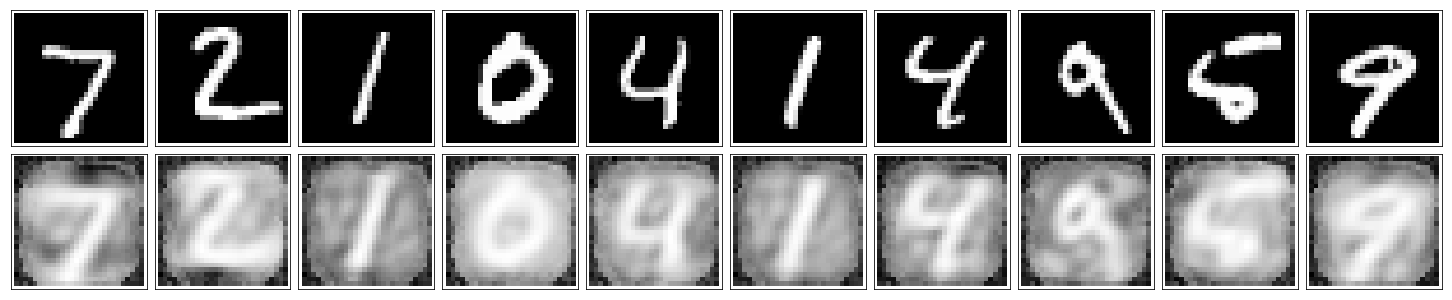

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([outputs_, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [18]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.